<a href="https://colab.research.google.com/github/HenriqueMAP/imersao-dados-3-alura/blob/main/Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafios da Imersão Dados 3ª Edição




## Aula 1: Python, Pandas e Pharmacia
### Desafio 01: Investigar o por quê da classe "tratamento" ser tão desbalanceada.
---
### Desafio 02: Plotar as 5 últimas linhas da tabela.
---
### Desafio 03: Proporção das classes de tratamento.
---
### Desafio 04: Quantos tipos de drogas foram investigados?
---
### Desafio 05: Procurar na documentação do Pandas sobre o método query.
---
### Desafio 06: Renomear as colunas removendo o hífen.
---
### Desafio 07: Melhorar a aparência dos gráficos, utilizando o matplotlib.pyplot.
---
### Desafio 08: Resumir o que você aprendeu.

## Resposta do Desafio 01: Investigar o por quê da classe "tratamento" ser tão desbalanceada.

### Quantidade de tratamentos utilizando drogas VS não utilizando drogas (com_controle)

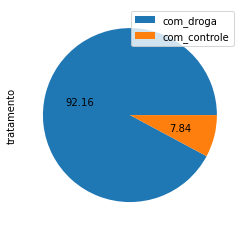

In [28]:
import pandas as pd
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')
tipos_tratamentos = dados['tratamento'].value_counts().plot.pie(
    labels=None,
    autopct="%.2f",
    legend=True,
    figsize=(4, 4),
    )

Resposta (Parte 1): Embora a quantidade de tratamentos utilizando drogas seja igual a 21 948, em contrapartida, a quantidade de tratamentos sem drogas (com_controle) é igal a 1 866. A princípio parece ser uma desproporcionalidade, mas isso só fica visível dessa forma, porque a análise nesse ponto é rasa, superficial, e precisa ser aprofundada.

### Quantidade da utilização de cada tipo de substância / composto

In [29]:
mapa = {'droga':'composto'}
dados.rename(columns=mapa, inplace = True)
dados['composto'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
19b95658c       1
e68b58a8f       1
209a68d23       1
a67f38a69       1
ddb7e0c01       1
Name: composto, Length: 3289, dtype: int64

Resposta (Parte 2): Para aprofundar essa análise, é necessário identificar se existem mais de uma substância utilizadas no tratamento sem drogas. Neste caso, é possível identificar que a substância utilizada foi apenas a denominada cacb2b860. Note que ao contar quantas vezes ela é utilizada, encontramos o mesmo valor de 1866 utilizado quando verificamos quantos tratamentos foram realizados anteriormente. Confira abaixo que somente existe essa subtância quando filtramos a coluna de "tratamento" para o valor de "com_controle".

### Verificação de substâncias utilizadas no tratamento "com_controle"

In [30]:
comcontrole = dados.query('"com_controle" in tratamento')
comcontrole['composto'].unique()

array(['cacb2b860'], dtype=object)

### Quantidade de utilização das substâncias

In [31]:
pd.crosstab(dados['composto'], dados['tratamento'])

tratamento,com_controle,com_droga
composto,,
00199ff52,0,6
00251fc41,0,6
00321ea80,0,12
0034c0847,0,6
0060e686f,0,6
...,...,...
ff9565933,0,6
ffd66e220,0,6
ffe357f8f,0,1


Resposta (Parte 3): O método crosstab do Pandas retornou a quantidade de vezes que cada tipos de substância / droga foi utilizada nos 23 814 tratamentos. 

Desse valor, sabemos que precisamos subtrair a quantidade de tratamentos realizados sem drogas, que corresponde a 1866 tratamentos. 

Assim, restam 21 948, dos quais podemos verificar com o retorno acima que são exatamente 3288 drogas utilizadas, sendo que retiramos 1 do total de linhas que o cross tab retorna devido a substância do tratamento com controle.

E se utilizarmos dados['composto'].value_counts() podemos ver que a droga mais utilizada á a denominada como 87d714366, da qual é utilizada 718 vezes. 

Agora sabendo disso, percebemos que a quantidade de tratamentos não utilizando drogas foi maior que qualquer tratamento utilizando uma droga específica. Ou seja, não existe nenhuma desproporcionalidade.

In [32]:
dados['composto'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
19b95658c       1
e68b58a8f       1
209a68d23       1
a67f38a69       1
ddb7e0c01       1
Name: composto, Length: 3289, dtype: int64

## Resposta do Desafio 02: Plotar as 5 últimas linhas da tabela.

In [33]:
dados.tail(5)

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


## Resposta do Desafio 03: Proporção das classes de tratamento.

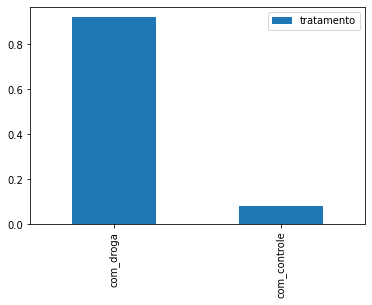

In [34]:
proporcao_tratamentos = dados['tratamento'].value_counts(normalize = True).plot.bar(legend=True)

## Resposta do Desafio 04: Quantos tipos de drogas foram investigados?

Conforme mostrado na célula abaixo, temos um total de 3289 compostos = 3288 drogas + 1 substância para tratamento sem drogas (cacb2b860).

In [35]:
dados['composto'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
19b95658c       1
e68b58a8f       1
209a68d23       1
a67f38a69       1
ddb7e0c01       1
Name: composto, Length: 3289, dtype: int64

## Resposta do Desafio 05: Procurar na documentação do Pandas sobre o método query.

In [36]:
comcontrole = dados.query('"com_controle" in tratamento')
comcontrole['composto'].unique()

array(['cacb2b860'], dtype=object)

## Resposta do Desafio 06: Renomear as colunas removendo o hífen.

In [63]:
number = 0
colunas = list(dados.columns)
titulo=[]
for number in range(number,len(colunas)):
  titulo.append(colunas[number].replace("-", " "))
  mapa={str(colunas[number]):str(titulo[number])}
  dados.rename(columns=mapa, inplace=True)
  number += 1

dados.head()

['id',
 'tratamento',
 'tempo',
 'dose',
 'composto',
 'g 0',
 'g 1',
 'g 2',
 'g 3',
 'g 4',
 'g 5',
 'g 6',
 'g 7',
 'g 8',
 'g 9',
 'g 10',
 'g 11',
 'g 12',
 'g 13',
 'g 14',
 'g 15',
 'g 16',
 'g 17',
 'g 18',
 'g 19',
 'g 20',
 'g 21',
 'g 22',
 'g 23',
 'g 24',
 'g 25',
 'g 26',
 'g 27',
 'g 28',
 'g 29',
 'g 30',
 'g 31',
 'g 32',
 'g 33',
 'g 34',
 'g 35',
 'g 36',
 'g 37',
 'g 38',
 'g 39',
 'g 40',
 'g 41',
 'g 42',
 'g 43',
 'g 44',
 'g 45',
 'g 46',
 'g 47',
 'g 48',
 'g 49',
 'g 50',
 'g 51',
 'g 52',
 'g 53',
 'g 54',
 'g 55',
 'g 56',
 'g 57',
 'g 58',
 'g 59',
 'g 60',
 'g 61',
 'g 62',
 'g 63',
 'g 64',
 'g 65',
 'g 66',
 'g 67',
 'g 68',
 'g 69',
 'g 70',
 'g 71',
 'g 72',
 'g 73',
 'g 74',
 'g 75',
 'g 76',
 'g 77',
 'g 78',
 'g 79',
 'g 80',
 'g 81',
 'g 82',
 'g 83',
 'g 84',
 'g 85',
 'g 86',
 'g 87',
 'g 88',
 'g 89',
 'g 90',
 'g 91',
 'g 92',
 'g 93',
 'g 94',
 'g 95',
 'g 96',
 'g 97',
 'g 98',
 'g 99',
 'g 100',
 'g 101',
 'g 102',
 'g 103',
 'g 104',
 'g 10

## Aula 2: Estatísticas, dados e distribuições
### Desafio 01: Ordenar o gráfico countplot.
---
### Desafio 02: Alterar o tamanho da fonte.
---
### Desafio 03: Plotar os histogramas com seaborn.
---
### Desafio 04: Estudar sobre as estatísticas retornadas no método describe().
---
### Desafio 05: Refletir sobre a manipulação do tamanho das visualizações.
---
### Desafio 06: Realizar outras análises com o boxplot e até com o histograma.


## Aula 3: Correlações e causalidade
### Desafio 01: Criar tabelas de frequência utilizando o método groupby() do Pandas.
---
### Desafio 02: Normalizar o método crosstab pela coluna.
---
### Desafio 03: Explorar outros agregadores.
---
### Desafio 04: Explorar o melt
---
### Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos.
---
### Desafio 06: Estudar o código que plota a matriz de correlação heatmap.
---
### Desafio 07: Resumo do que você aprendeu com os dados.

## Aula 4: Merge e Análise de Resultados
### Desafio 01: Encontrar o top 10 das ações do MOA (inibidor, agonista,...)
---
### Desafio 02: Cria a coluna chamada eh_controle para quando na linha tratamento for igual a com_controle
---
### Desafio 03: Criar três colunas para indicar o tempo 24, 48, 72
---
### Desafio 04: Estudar sobre combinações DF https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
---
### Desafio 05: Fazer análise mais detalhada considerando tempo e dose, para comparar as distribuições. Escolher uma droga e comparar com controle.
---
### Desafio 06: Descobrir se tempo algum composto que dependendo da configuração do experimento, ativa ou não algum MOA.
---
### Desafio 07: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa um MOA diferente.
---
### Desafio 08: Resumir o que você aprendeu.

## Aula 05: Machine Learning e Sci-kit Learning
### Desafio 01: Tentar outros modelos ou mudar os parâmetros dos modelos que testamos na aula.
---
### Desafio 02: Estudar a documentação do Sklearn.
---
### Desafio 03: Pesquisar o fluxograma escolhendo o melhor modelo.
---
### Desafio 04: Testar outras soluções. 0, 1 ou +
---
### Desafio 05: escolha uma droga mais utilizada e tentar criar um modelo para prever essa label.